In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)

In [4]:
# Here we will combine our datasets to manipulate them together with ease.
combine=[df_train,df_test]
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

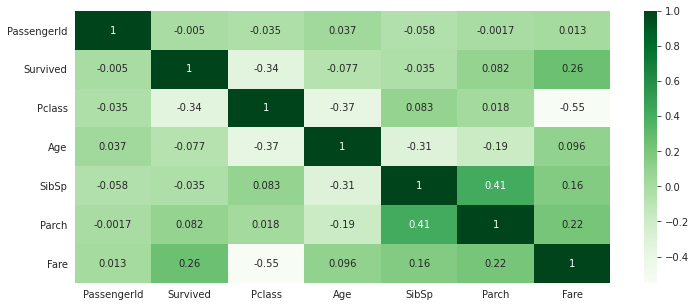

In [5]:
# We will first observe the correlations between the columns
plt.figure(figsize=(12,5))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens')

***We will plot some figures to get a better understanding of the correlating data columns.***

<AxesSubplot:xlabel='Survived', ylabel='count'>

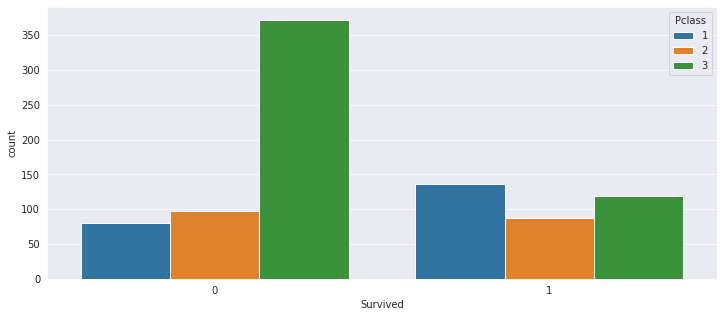

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x='Survived',hue='Pclass',data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

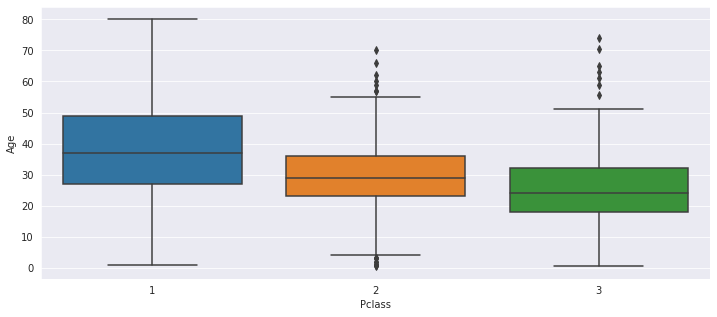

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Pclass',y='Age',data=df_train)

In [8]:
#Quick details of the training data 
df_train.info()
def missing_values(df,columns):
    mvalues={}
    for col in columns:
        c=df[col].isnull().sum()
        mvalues[col]=c
    return mvalues
print('Missing Value count for each column:')
missingvalue=missing_values(train,train.columns)
missingvalue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Missing Value count for each column:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

***We can see 'Cabin', 'Age' and 'Embarked' columns are missing some values. Cabin columns are missing a large portion of data.***

In [9]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

***It is better to drop the cabin column. From the Age vs Pclass boxplot graph we can see that the Age column is closely related to the Pclass. We can Ampute the Age column:***

<AxesSubplot:>

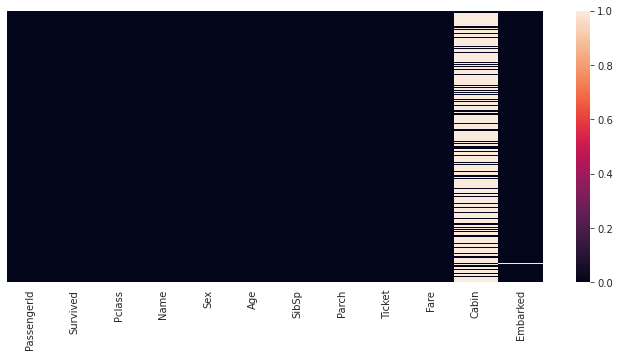

In [10]:
def age_fill(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age
for dataset in combine:  # It executes on both the df_train and df_test datasets
    dataset['Age']=dataset[['Age','Pclass']].apply(age_fill, axis=1)
plt.figure(figsize=(12,5))
sns.heatmap(df_train.isnull(),yticklabels=False)


***We will drop the Cabin column and also remove those two null('Embarked') columns from the df_train dataframe.***

In [11]:
#PassengerId column is not giving any info regarding survival probablity. So, we are dropping them as well.
for dataset in combine:
    dataset.drop(['PassengerId','Name','Cabin'], inplace=True, axis=1)
# We are also dropping any row which holds a null value in the training set.
df_train.dropna(inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

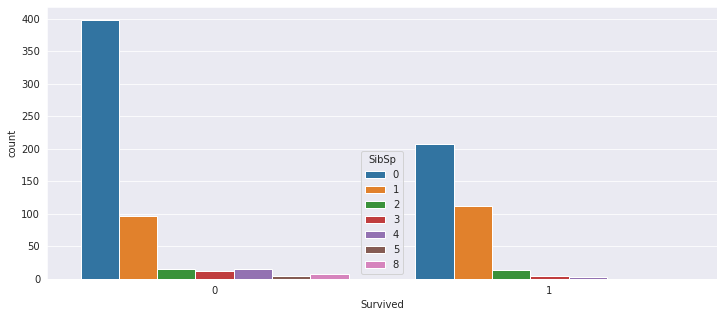

In [12]:
#We will now look at the columns SibSP and Parch.
plt.figure(figsize=(12,5))
sns.countplot(x='Survived',hue='SibSp',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

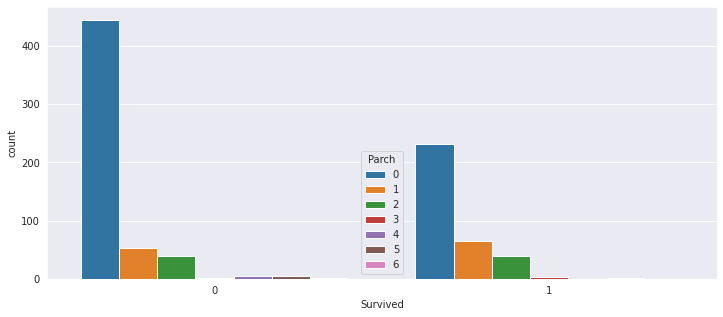

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='Survived',hue='Parch',data=df_train)

***We can see from the above two countplots that, those who had neither any spouse/children nor any parents had a lower chance of survival. So, we can create a new column, 'Alone' merging these two columns info.***

In [14]:
def alone_column(col):
    sib=col[0]
    par=col[1]
    total=sib+par
    if total==0:
        return 1
    else:
        return 0
for dataset in combine:
    dataset['Alone']=dataset[['SibSp','Parch']].apply(alone_column,axis=1)
    dataset.drop(['SibSp','Parch'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone
0,0,3,male,22.0,A/5 21171,7.2500,S,0
1,1,1,female,38.0,PC 17599,71.2833,C,0
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1
3,1,1,female,35.0,113803,53.1000,S,0
4,0,3,male,35.0,373450,8.0500,S,1


In [15]:
# We will now look at the sex and embarked columns.
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
# Now sex column will hold 1 for female and 0 for male 
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [17]:
df_train['Embarked'].unique()
# We will do the similiar for the 'Embarked' column as it has 3 unique values.

array(['S', 'C', 'Q'], dtype=object)

In [18]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 1, 'C': 0, 'Q':2} ).astype(int)


In [19]:
df_train.drop(['Ticket','Fare'],axis=1,inplace=True)
df_test.drop(['Ticket','Fare'],axis=1,inplace=True)
df_train.head(2)

,Survived,Pclass,Sex,Age,Embarked,Alone
0,0,3,0,22.0,1,0
1,1,1,1,38.0,0,0


In [20]:
df_test.head(2)

,Pclass,Sex,Age,Embarked,Alone
0,3,0,34.5,2,1
1,3,1,47.0,1,0


In [21]:
#Splitting the 'Survived' Column from the df_train dataframe
train_y=df_train['Survived']
df_train.drop(['Survived'],axis=1,inplace=True)

# KNeighborsClassifier

Now here in this notebook, i have only used KNeighborsClassifier model to train and predict data. I will include more models in future. 

In [22]:
# Libraries import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
scaler=StandardScaler()
scaler_train=scaler.fit_transform(df_train)
scaled_df_train=pd.DataFrame(scaler_train,columns=df_train.columns) 
#S.scaled train data excluding 'Survived' column
scaled_df_train.head()    

,Pclass,Sex,Age,Embarked,Alone
0,0.825209,-0.735342,-0.530714,0.198804,-1.229349
1,-1.572211,1.359911,0.681145,-1.743356,-1.229349
2,0.825209,1.359911,-0.227749,0.198804,0.813439
3,-1.572211,1.359911,0.453921,0.198804,-1.229349
4,0.825209,-0.735342,0.453921,0.198804,0.813439


In [24]:
X=scaled_df_train
y=train_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
knn=KNeighborsClassifier(n_neighbors=5) # initial test with value 5
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(classification_report(y_test,predknn))
print(confusion_matrix(y_test,predknn))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.72      0.72      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178

[[90 19]
 [19 50]]


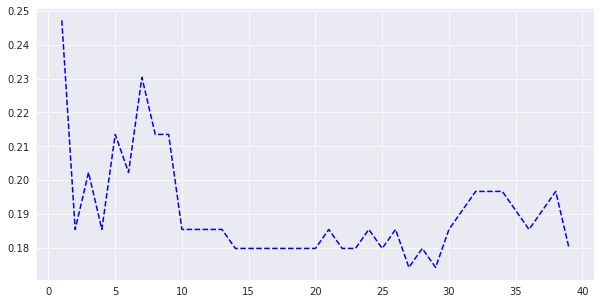

In [25]:
#Now we will choose best n_neighbors values for KN Model
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed')

# Now we train the whole train set and test the data against the model


In [26]:
scaler_test=StandardScaler()
test_df=scaler_test.fit_transform(df_test)
test_df=pd.DataFrame(test_df,columns=df_test.columns)

In [27]:
knn1=KNeighborsClassifier(n_neighbors=18)
knn1.fit(X,y)
predict=knn1.predict(test_df)

In [28]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':predict})
submission.to_csv('submission.csv',index=False)
print('Submission saved!')

Submission saved!


# Thanks for reading. Don't forget to upvote the work. Good luck kaggling!